<a href="https://colab.research.google.com/github/anpham1331/ECGR4105-Intro-to-ML/blob/main/ECGR_4105_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
#https://github.com/anpham1331/ECGR4105-Intro-to-ML/tree/main

#uses cancer.csv and diabetes.csv for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB


from google.colab import drive
drive.mount('/content/drive')

path_file1 = "/content/drive/MyDrive/Colab Notebooks/diabetes.csv"
diabetes = pd.read_csv(path_file1)

path_file2 = "/content/drive/MyDrive/Colab Notebooks/cancer.csv"
cancer = pd.read_csv(path_file2)

# Defining the map function for cancer. Maps M to 1 and B to 0
varlist = ['diagnosis']
def binary_map(x):
    return x.map({'M': 1, 'B': 0})
# Applying the function to the housing list
cancer[varlist] = cancer[varlist].apply(binary_map)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 0 1 0 0 1 1 0]
[[98  9]
 [18 29]]
Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
F1: 0.6823529411764706


Text(0.5, 427.9555555555555, 'Predicted label')

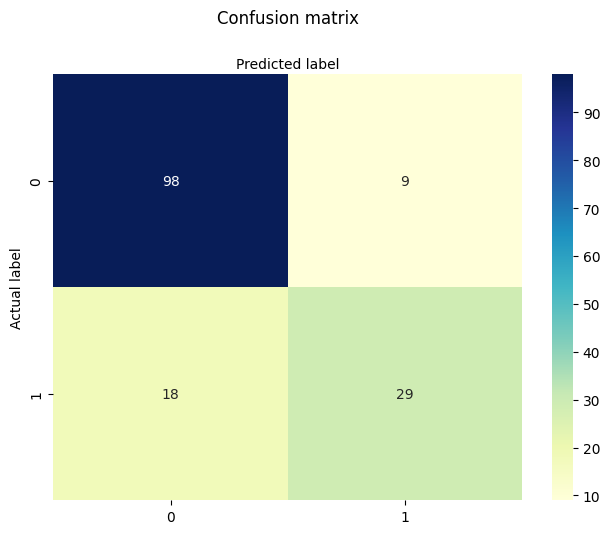

In [62]:
#Problem 1 - Diabetes dataset

#Get Values
X = diabetes.iloc[:, [0,1,2,3,4,5,6,7]].values
print(X)
Y = diabetes.iloc[:,8].values

#Split Data, 80% training, 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#Scaling
sc = StandardScaler() # Create a scaler object
X_train = sc.fit_transform(X_train) # Fit the scaler to the training data and transform
X_test = sc.transform(X_test) # Apply the scaler to the test data

#Standardization

#Logistic Regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)
LogisticRegression(random_state=0)
Y_pred = classifier.predict(X_test)
print(Y_pred[0:9])
X[0:10]

#Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
print(cnf_matrix)

#Metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
precision = metrics.precision_score(Y_test, Y_pred)
print("Precision:",precision)
recall = metrics.recall_score(Y_test, Y_pred)
print("Recall:",recall)
F1 = 2 * (precision * recall) / (precision + recall)
print("F1:",F1)

#Plot Accuracy over Iterations

#Confusion Matrix Heat Map
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accuracy: 0.9649122807017544
Precision: 0.9574468085106383
Recall: 0.9574468085106383
F1: 0.9574468085106385


Text(0.5, 427.9555555555555, 'Predicted label')

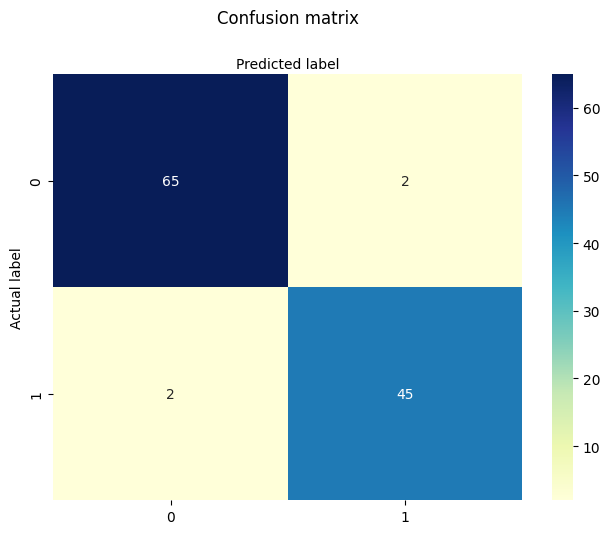

In [84]:
#Problem 2 - a) Cancer with no weight penalty

#Get Values
X = cancer.iloc[:, 2:32].values
Y = cancer.iloc[:, 1].values

#Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

#Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Logistic Regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

#Using Confusion matrix we can get accuracy of our model.
from sklearn.metrics import confusion_matrix
cnf_matrix_2 = confusion_matrix(Y_test, Y_pred)
cnf_matrix_2

#Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
precision = metrics.precision_score(Y_test, Y_pred)
print("Precision:",precision)
recall = metrics.recall_score(Y_test, Y_pred)
print("Recall:",recall)
F1 = 2 * (precision * recall) / (precision + recall)
print("F1:",F1)

#Let's visualize the results of the model in the form of a co#nfusion matrix using matplotlib and seaborn.
#Here, you will visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accuracy: 0.9649122807017544
Precision: 0.9574468085106383
Recall: 0.9574468085106383
F1: 0.9574468085106385


Text(0.5, 427.9555555555555, 'Predicted label')

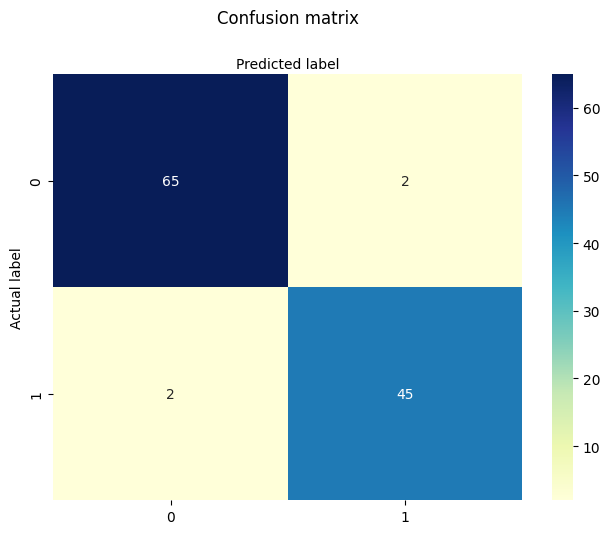

In [85]:
#Problem 2 - b) Cancer with weight penalty

# Logistic Regression with weight penalty
classifier_penalty = LogisticRegression(random_state=0, penalty='l2', C=0.01)  # You can adjust the value of C
classifier_penalty.fit(X_train, Y_train)
Y_pred_penalty = classifier_penalty.predict(X_test)

#Using Confusion matrix we can get accuracy of our model.
from sklearn.metrics import confusion_matrix
cnf_matrix_3 = confusion_matrix(Y_test, Y_pred)
cnf_matrix_3

#Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
precision = metrics.precision_score(Y_test, Y_pred)
print("Precision:",precision)
recall = metrics.recall_score(Y_test, Y_pred)
print("Recall:",recall)
F1 = 2 * (precision * recall) / (precision + recall)
print("F1:",F1)

#Let's visualize the results of the model in the form of a co#nfusion matrix using matplotlib and seaborn.
#Here, you will visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accuracy: 0.9035087719298246
Precision: 0.875
Recall: 0.8936170212765957
F1: 0.8842105263157894


Text(0.5, 427.9555555555555, 'Predicted label')

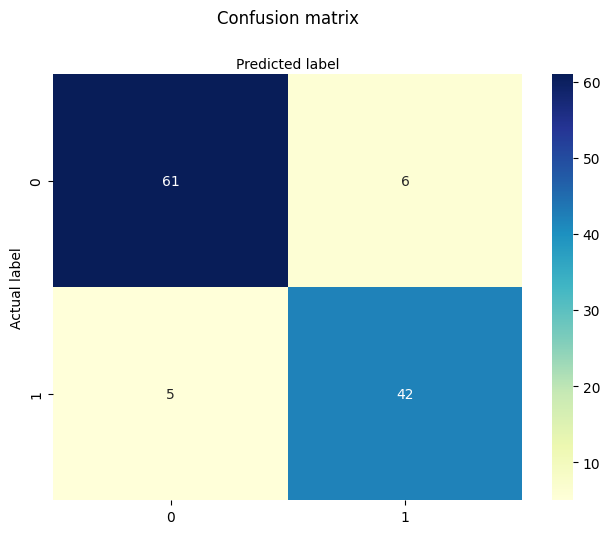

In [86]:
#Problem 3 - Cancer dataset with Naive Bayes
#Get Values
X = cancer.iloc[:, 2:32].values
Y = cancer.iloc[:, 1].values
#Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
#Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Naive Bayes Classifier
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred  =  classifier.predict(X_test)

#Metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
precision = metrics.precision_score(Y_test, Y_pred)
print("Precision:",precision)
recall = metrics.recall_score(Y_test, Y_pred)
print("Recall:",recall)
F1 = 2 * (precision * recall) / (precision + recall)
print("F1:",F1)

#Using Confusion matrix we can get accuracy of our model.
from sklearn.metrics import confusion_matrix
cnf_matrix_4 = confusion_matrix(Y_test, Y_pred)
cnf_matrix_4

#Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.
#Here, you will visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_4), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


The number in () next to each metric represents the number of PCA Principal Components used
Accuracy(30): 0.9649122807017544
Precision(30): 0.9574468085106383
Recall(30): 0.9574468085106383
F1(30): 0.9574468085106385
Accuracy(6): 0.956140350877193
Precision(6): 0.9565217391304348
Recall(6): 0.9361702127659575
F1(6): 0.9462365591397849


Text(0.5, 427.9555555555555, 'Predicted label')

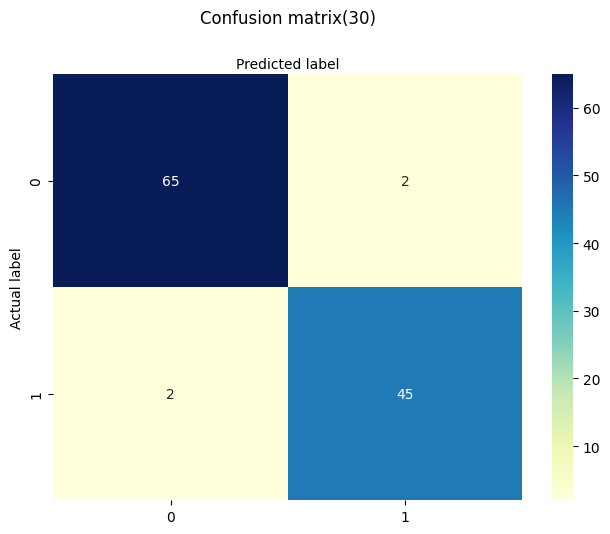

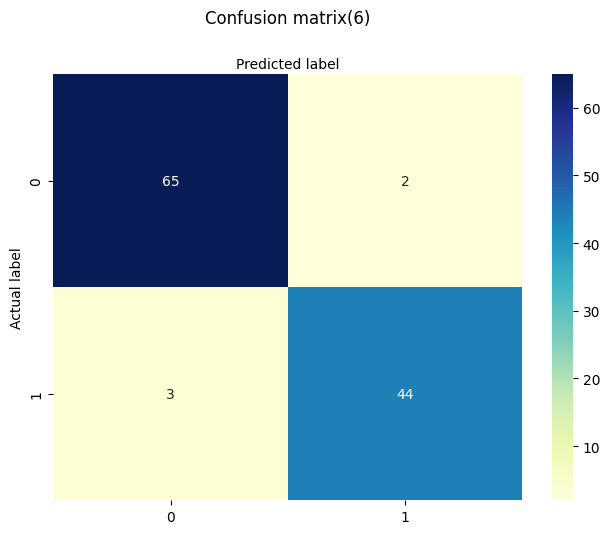

In [126]:
#Problem 4 - Cancer with PCA + Logistic Regression

#Get Values
X = cancer.iloc[:, 2:32].values
Y = cancer.iloc[:, 1].values
#Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
#Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


#Principal Components:30
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Logistic Regression on PCA-transformed data
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_pca, Y_train)
Y_pred = classifier.predict(X_test_pca)

#Metrics
print("The number in () next to each metric represents the number of PCA Principal Components used")
print("Accuracy(30):",metrics.accuracy_score(Y_test, Y_pred))
precision = metrics.precision_score(Y_test, Y_pred)
print("Precision(30):",precision)
recall = metrics.recall_score(Y_test, Y_pred)
print("Recall(30):",recall)
F1 = 2 * (precision * recall) / (precision + recall)
print("F1(30):",F1)

#Using Confusion matrix we can get accuracy of our model.
from sklearn.metrics import confusion_matrix
cnf_matrix_5a = confusion_matrix(Y_test, Y_pred)
cnf_matrix_5a

#Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.
#Here, you will visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_5a), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix(30)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



#Principal Components: 6
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Logistic Regression on PCA-transformed data
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_pca, Y_train)
Y_pred = classifier.predict(X_test_pca)

#Metrics
print("Accuracy(6):",metrics.accuracy_score(Y_test, Y_pred))
precision = metrics.precision_score(Y_test, Y_pred)
print("Precision(6):",precision)
recall = metrics.recall_score(Y_test, Y_pred)
print("Recall(6):",recall)
F1 = 2 * (precision * recall) / (precision + recall)
print("F1(6):",F1)

#Using Confusion matrix we can get accuracy of our model.
from sklearn.metrics import confusion_matrix
cnf_matrix_5b = confusion_matrix(Y_test, Y_pred)
cnf_matrix_5b

#Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.
#Here, you will visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_5b), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix(6)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The number in () next to each metric represents the number of PCA Principal Components used
Accuracy(15): 0.9210526315789473
Precision(15): 0.9130434782608695
Recall(15): 0.8936170212765957
F1(15): 0.9032258064516129
Accuracy(30): 0.8508771929824561
Precision(30): 0.8409090909090909
Recall(30): 0.7872340425531915
F1(30): 0.8131868131868133


Text(0.5, 427.9555555555555, 'Predicted label')

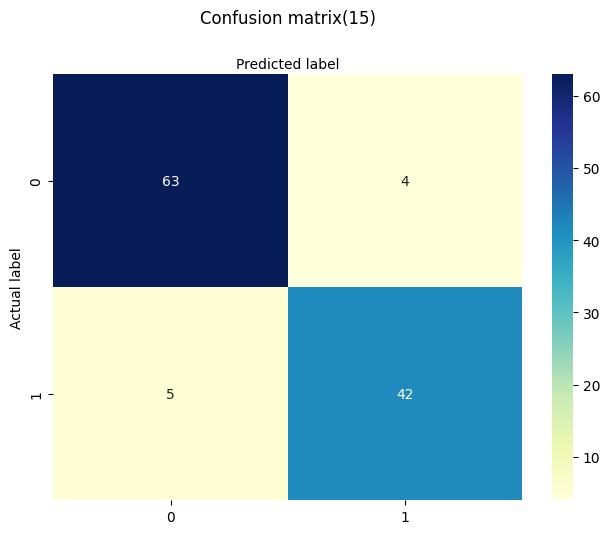

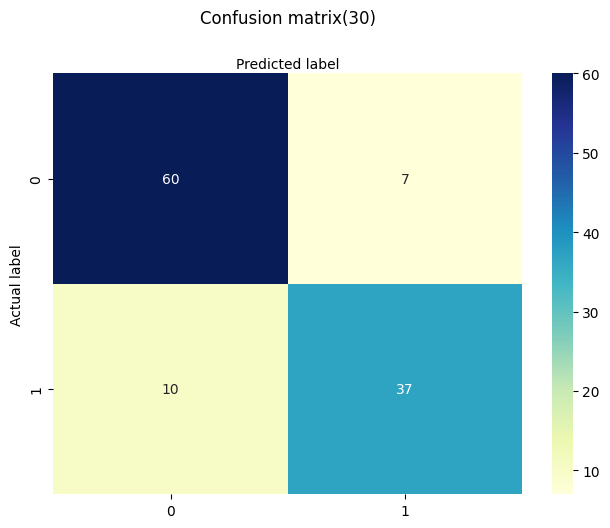

In [127]:
#Problem 5 - Cancer dataset with PCA + Naive Bayes

#Get Values
X = cancer.iloc[:, 2:32].values
Y = cancer.iloc[:, 1].values
#Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
#Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Principal Components:15
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#Naive Bayes Classifier
classifier = GaussianNB()
classifier.fit(X_train_pca, Y_train)
Y_pred  =  classifier.predict(X_test_pca)

#Metrics
print("The number in () next to each metric represents the number of PCA Principal Components used")
print("Accuracy(15):",metrics.accuracy_score(Y_test, Y_pred))
precision = metrics.precision_score(Y_test, Y_pred)
print("Precision(15):",precision)
recall = metrics.recall_score(Y_test, Y_pred)
print("Recall(15):",recall)
F1 = 2 * (precision * recall) / (precision + recall)
print("F1(15):",F1)

#Using Confusion matrix we can get accuracy of our model.
from sklearn.metrics import confusion_matrix
cnf_matrix_6a = confusion_matrix(Y_test, Y_pred)
cnf_matrix_6a

#Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.
#Here, you will visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_6a), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix(15)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



#Principal Components:30
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#Naive Bayes Classifier
classifier = GaussianNB()
classifier.fit(X_train_pca, Y_train)
Y_pred  =  classifier.predict(X_test_pca)

#Metrics
print("Accuracy(30):",metrics.accuracy_score(Y_test, Y_pred))
precision = metrics.precision_score(Y_test, Y_pred)
print("Precision(30):",precision)
recall = metrics.recall_score(Y_test, Y_pred)
print("Recall(30):",recall)
F1 = 2 * (precision * recall) / (precision + recall)
print("F1(30):",F1)

#Using Confusion matrix we can get accuracy of our model.
from sklearn.metrics import confusion_matrix
cnf_matrix_6b = confusion_matrix(Y_test, Y_pred)
cnf_matrix_6b

#Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.
#Here, you will visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_6b), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix(30)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')